### Hello!!! 

This is a data science project to build a machine learning model to predict loan approval status based on applicants' financial and demographic data. 
The dataset used for this project can be accessed through the Kaggle Loan-Approval-Prediction-Dataset. The link to the file is [HERE](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data) 

A project like this will help real-world needs as it helps financial institutions to accrately predict credit risk and the institutions minimize losses, allocate resources optimally and enhance decision-making

The data has a few columns and this is a concise explanation of each of the columns in the dataset.

1. loan_id: A unique identifier for each loan application.
2. no_of_dependents: The number of dependents (e.g., children, elderly) supported by the applicant.
3. education: The educational qualification of the applicant (e.g., graduate, non-graduate).
4. self_employed: Indicates whether the applicant is self-employed (Yes/No).
5. income_annum: The applicant's annual income.
6. loan_amount: The amount of the loan requested by the applicant.
7. loan_term: The duration of the loan repayment period (in years).
8. cibil_score: The applicant's credit score, used to evaluate creditworthiness.
9. residential_assets_value: The value of residential properties owned by the applicant.
10. commercial_assets_value: The value of commercial properties owned by the applicant.
11. luxury_assets_value: The value of luxury assets (e.g., cars, jewelry) owned by the applicant.
12. bank_asset_value: The value of assets (e.g., savings, deposits) held by the applicant in the bank.
13. loan_status: The current status of the loan (e.g., approved or rejected).

### Step 1 Import libraries 
In this step, We will be importing libraries we need for this project. We can do this by either importing all the libraries at once or by importing each library as they are needed. We will be choosing the first method. 
 We will be importing all at once 

In [43]:
# Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced statistical plots

# Machine Learning
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling and encoding
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.neighbors import KNeighborsClassifier  # KNN model
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import make_scorer,accuracy_score, f1_score,precision_score,recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  # For model evaluation
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning 



print("All libraries imported succssfully")

All libraries imported succssfully


### Step 2 load the dataset and explore it. 

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

df.head()#Check the first 5 rows of the dataframe

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.columns #To Check if columns have spaces 

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

Most of the columns have leading spaces 
we will be stripping the columns to make it easier to access 

In [4]:
df.columns = df.columns.str.strip() 
df.columns # To confirm 

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


The columns are in their appropriate data type. Most of the columns are in the Int64 formats with 3 exceptions like 'Education , self-employed and loan status'

There are no missing values in the dataset. 

In [6]:
df.describe(include='all') #The default for the describe() function with pandas only includes the numerical variables , thus the " include='all' " parameter

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


First few observations from the descriptive summary:
1. no_of_dependents: On average, loan applicants have around 2.5 dependents, with a standard deviation of 1.7, indicating moderate variation in family size.
2. education: Most applicants are graduates, with 2144 graduates compared to 2125 non-graduates, suggesting a higher proportion of educated applicants tho it is fairly close to one another,  it indicates that educational qualification doesn't seem to strongly impact the distribution of loan applicants.
3. self_employed: More than half (2150) of the applicants are self-employed, which may reflect the lending institution’s focus on self-employed individuals.
4. income_annum: The mean annual income is 5.06 million, but with high variability (standard deviation of 2.8 million), showing significant income disparities among applicants.
5. loan_amount: The average loan amount is 15.13 million, with a high standard deviation of 9.04 million, indicating large differences in the loan amounts requested by applicants.
6. loan_term: The average loan term is about 11 years, with terms ranging from 2 to 20 years, showing considerable variability in the loan durations.
7. cibil_score: The average CIBIL score is 599.94 which is slighly lower than the median of 600. The median of 600 suggests that half of the borrowers in the dataset have scores below 600 and half have scores above 600. This suggests a bimodal distribution as tge minimum is 300 and maximum is 900.
8. residential_assets_value: The mean value of residential assets is 7.47 million, but the range is wide, indicating high variability in applicants' residential property values, with some negative values likely indicating data issues.
9. commercial_assets_value: The average value of commercial assets is 4.97 million, with considerable variation, showing that applicants' commercial property values are quite diverse.
10. luxury_assets_value: Applicants have an average luxury assets value of 15.13 million, with large differences between applicants, reflecting significant variation in their luxury asset holdings.
11. bank_asset_value: The mean value of bank assets is 4.98 million, with high variability, suggesting that applicants have a wide range of financial assets.
12. loan_status: Most loan applications (2656) were approved, while 1613 were rejected, indicating a higher loan approval rate in the dataset.

In [7]:
df.shape

(4269, 13)

We have 4269 rows and 13 columns in the dataset.

In [8]:
df.isna().sum() #To confirm that there are no missing values in the dataset

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Check for duplicates 

We will be doing this by using the pandas .duplicated() function to do that. The function returns a  Boolean Series where each entry is True if the corresponding row is a duplicate (i.e., it has the same values as a previous row in the DataFrame) and False if it is not. 

afterwrds we will be adding the .sum() function to return the sum of how many times the series had a True.

In [9]:
duplicates = df.duplicated()

#Count duplicates
duplicate_count = duplicates.sum()
print(f"Total number of duplicate rows: {duplicate_count}")

Total number of duplicate rows: 0


There are no duplicates in the dataframe.

The dataset is clean and ready for the next step, which is to properly perform Exploratory Data Analysis(EDA) . 
Though We have already ran some initial checks(like descriptive summary,info,duplicates and missing values) on the data which is a part of EDA 
EDA is a lot more than that and that is what We will be working on in the next step.


### Step 3 Exploratory Data Analysis(EDA)

#### Uni-Variate Analysis 

We will start by chechking how the target variable is to know if there would be bias or not

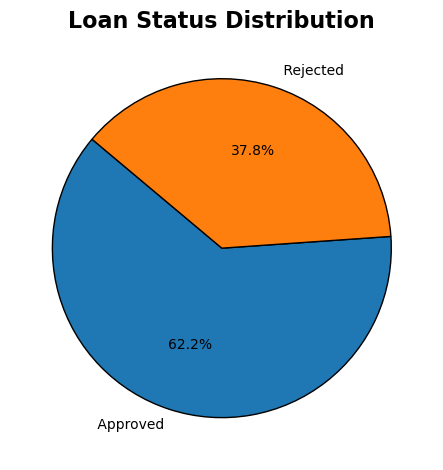

In [11]:
loan_status_counts = df['loan_status'].value_counts()

plt.pie(
    loan_status_counts,
    labels=loan_status_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

# Add a title
plt.title('Loan Status Distribution', fontsize=16, fontweight='bold')

# Show the chart
plt.tight_layout()
plt.show()

The dataset is biased towards the approved class as we can see from the chart above, Approved is almost about 25 percent more than not approved . 

From the earlier analysis, we observed that the no_of_dependents column contains discrete values ranging from 0 to 5. Therefore, we will treat it as a categorical variable for the EDA.

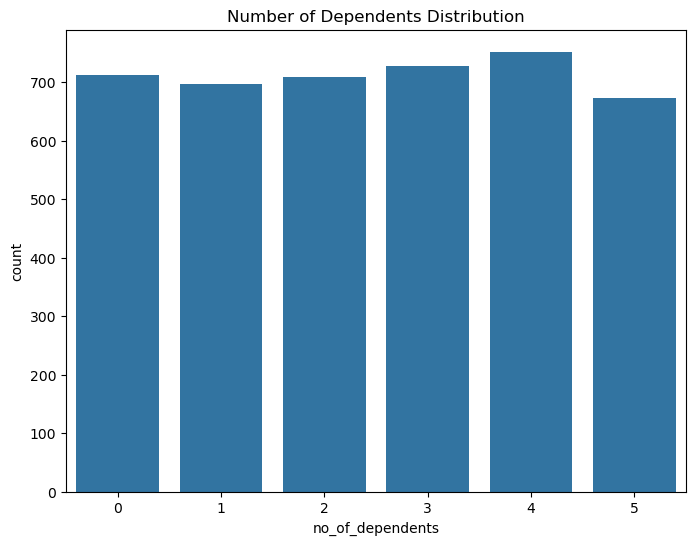

In [12]:
#Countplot for the categorical variables plus the no_of_dependents column
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='no_of_dependents')
plt.title("Number of Dependents Distribution")
plt.show()

From this countplot, we can observe that there is a somewhat even distribution of the number of dependents, though with variations. Applicants with 4 dependents have the most occurrences, while those with 5 dependents have the least. I will be performing further analysis to see if having more dependents, and thus more financial burdens, impacts loan status.


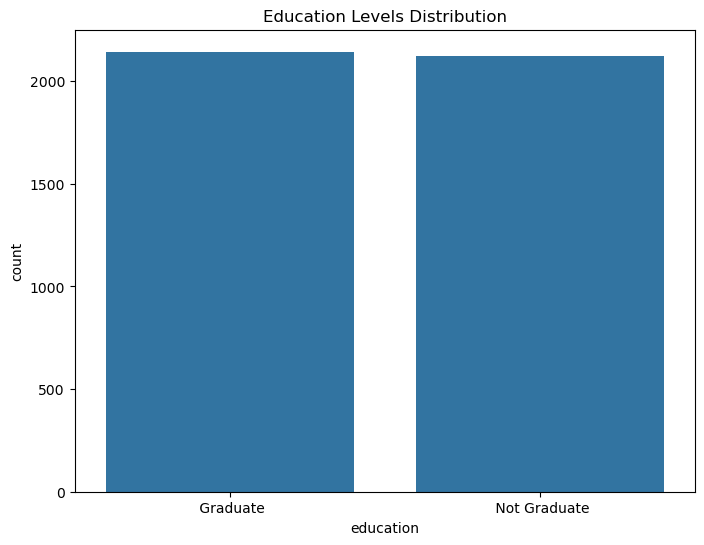

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='education')
plt.title("Education Levels Distribution")
plt.show()

From observing the countplot above, we can see that there is a relatively even distribution between graduates and non-graduates, though graduates are a little more than non-graduates. This suggests that education may not have a significant impact on loan applications. However, we will conduct further analysis to investigate its influence on loan status.


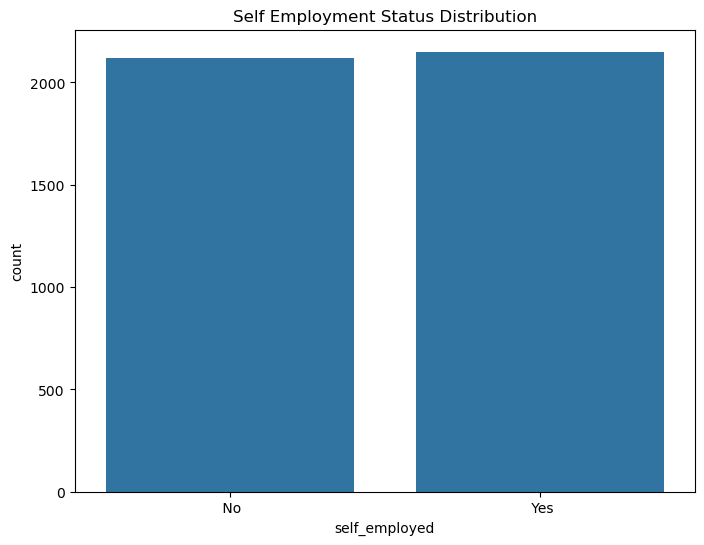

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='self_employed')
plt.title("Self Employment Status Distribution")
plt.show()

From observing the countplot above, we can see that there is a relatively even distribution between being self-employed or not, though being self-employed are a little more. This suggests that self-employment may not have a significant impact on loan applications. However, we will conduct further analysis to investigate its influence on loan status.

From analyzing the countplot, we can see that out of loan applications, over 2,600 were approved, while about 1,600 were rejected. This indicates high approval rates. There is also a bias in the target variable as there are way more approved loans than rejected ones.

From analyzing the histogram, it appears there is an approximately uniform distribution of annual incomes. This might indicate that no particular income level is overwhelmingly more common than others within this range. 

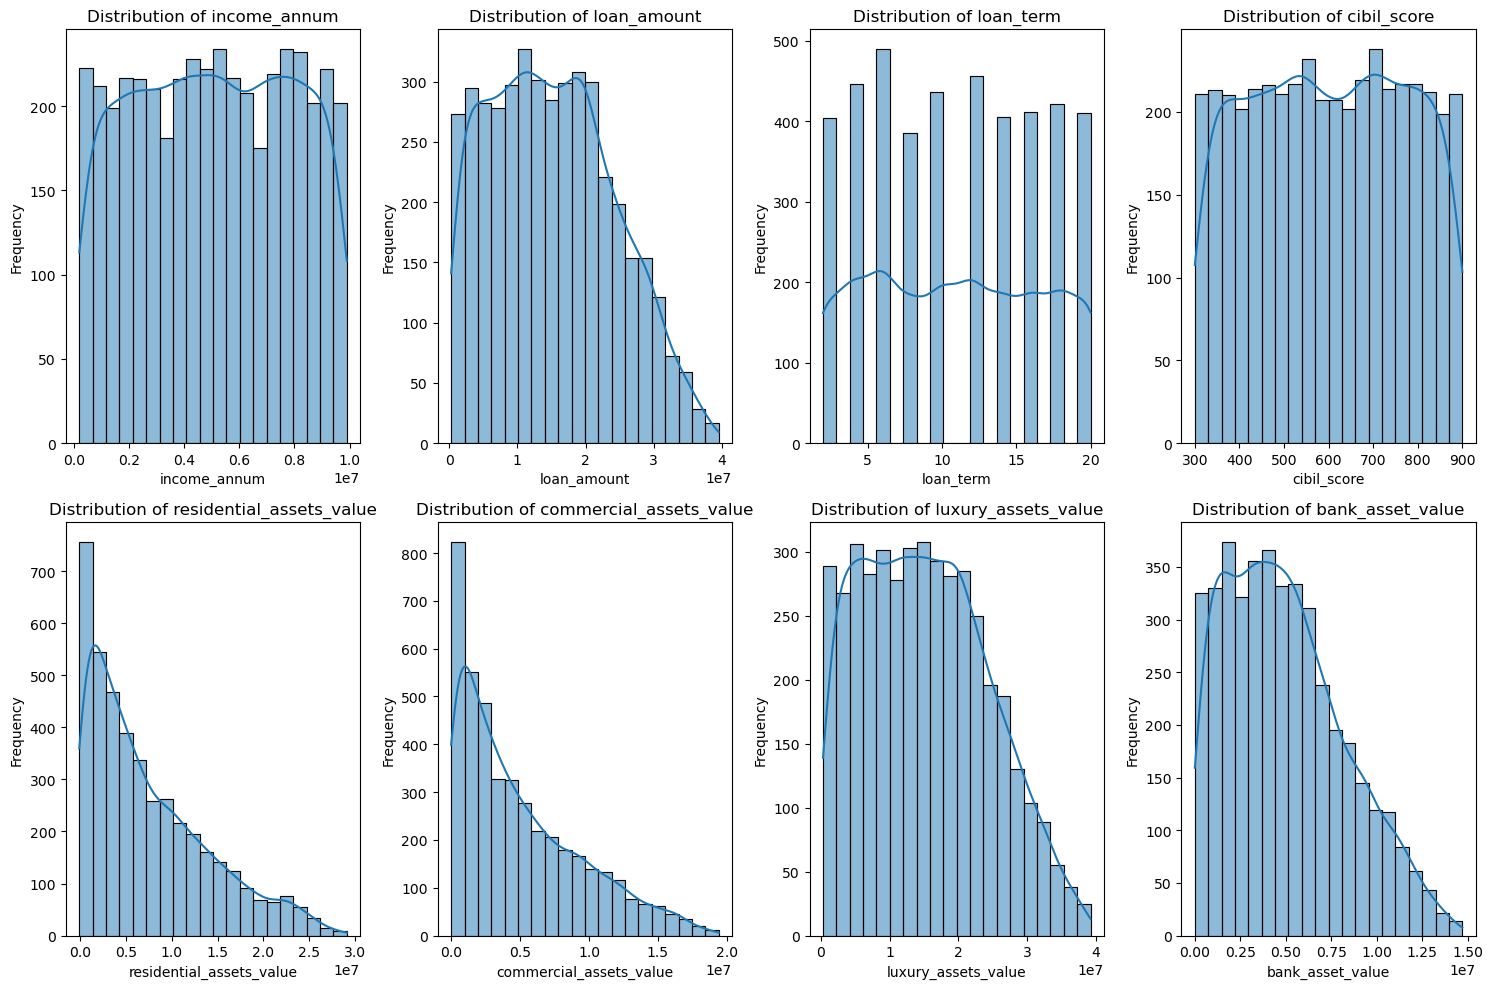

In [15]:
# List of numerical columns
numerical_columns = ['income_annum', 'loan_amount','loan_term',
                     'cibil_score', 'residential_assets_value',
                     'commercial_assets_value', 'luxury_assets_value',
                     'bank_asset_value']

#Subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
axes = axes.flatten() 

# Loop through the numerical columns and plot histograms
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


Observations from the histograms: 
1. Income Annum: Appears fairly uniform but with slight peaks in some ranges.
There are no significant outliers, and the data spans a wide range, suggesting diverse income levels.
2. Loan Amount: Positively skewed distribution.
Most loans fall within the range of lower amounts, with fewer instances of high loan amounts.
3. Loan Term: Evenly distributed across various terms with no specific concentration.
Indicates flexibility in loan tenure.
4. CIBIL Score: Distribution is roughly uniform, with most scores between 400 and 800.
Suggests applicants come from varied credit backgrounds.
5. Residential Assets Value: Positively skewed, with most values clustered toward lower asset values.
Very few applicants possess high residential asset values.
6. Commercial Assets Value: Similar distribution to residential assets, with a strong positive skew.
Indicates fewer applicants have high-value commercial assets.
7. Luxury Assets Value: Distribution indicates a concentration at lower luxury asset values.
Very few applicants have significant luxury assets.
8. Bank Asset Value: Also positively skewed, with most applicants having lower values of bank assets.
Only a small group has high bank assets.

#### Bi-Variate 
This is to check the relationships between two variables , most especially the loan status with the variables. 

1. Categorical vs Target variable(Loan Status)

Education Vs Loan Status:

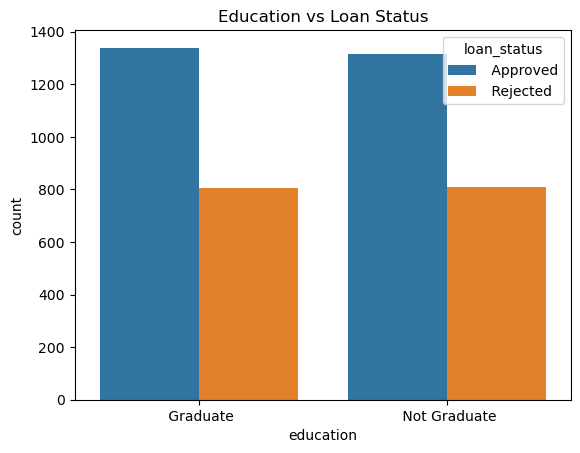

In [16]:
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.show()


From observing the countplot above, We can see there is a high approval rate of loans compared to rejection showing overall trend of more approvals.
We can also see that difference between approval rates of loans between Graduates and Not graduates are minimal, same with the rejection rate, This shows a balanced distribution.We can also say that education levels does not directly affect loan approvals.

Self-Emploed Vs Loan Status:

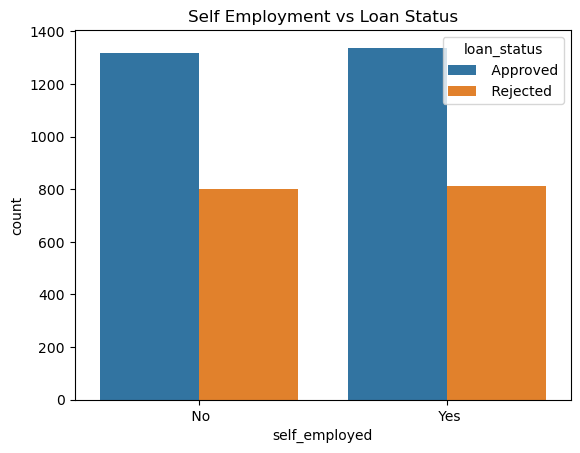

In [17]:
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title('Self Employment vs Loan Status')
plt.show()


From observing the countplot above, We can also see that difference between approval rates of loans between applicants that are Self-Employed and those that are not are minimal, same with the rejection rate, This shows a balanced distribution. We can also say that Self Employment does not directly affect loan approvals.

Number of dependents vs Loan Status :

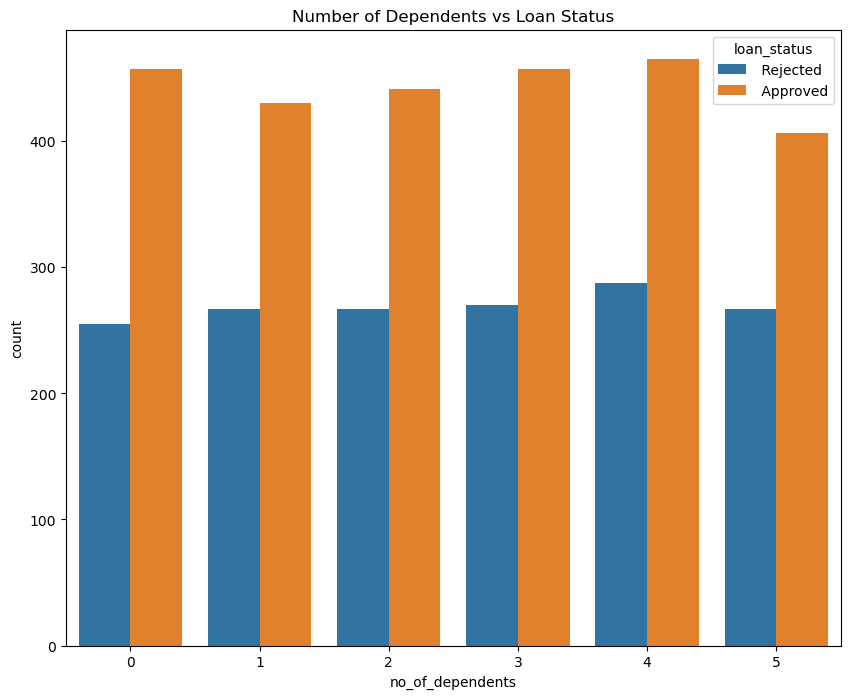

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='no_of_dependents', hue='loan_status', data=df)
plt.title('Number of Dependents vs Loan Status')
plt.show()


For all values of number of dependents (0 - 5), loan approvals which is shown in the orang colour consistently outnumber rejections.
This suggests that the number of dependents does not drastically affect loan approval.
The approval rate seems consistent regardless of the number of dependents. No significant decrease in approval is seen as the number of dependents increases. 

From all three countplots analyzed, We can say individually the variables(Education, Self-Employment, and Number of dependents) do not individually affect loan approval. But we will be using modelling later in the project to check how they might affect the loan approval with other variables. 

2. Numerical vs Target variable

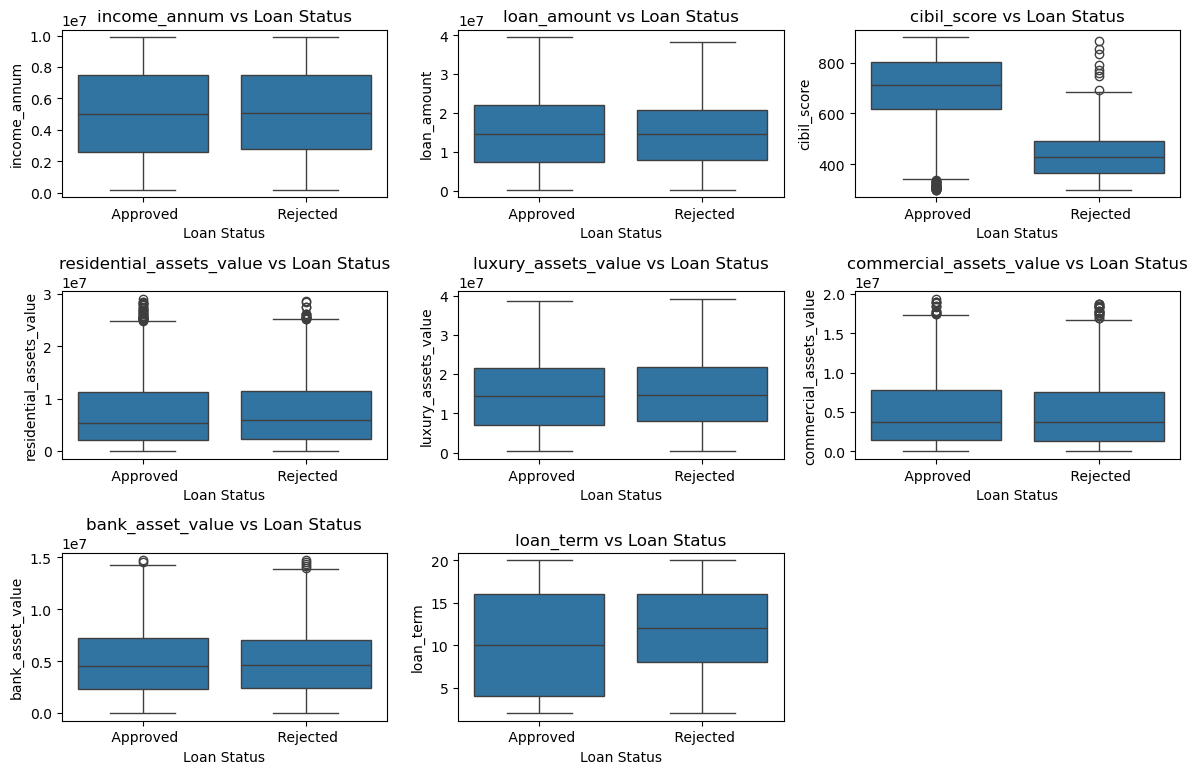

In [19]:
numerical_columns = ['income_annum', 'loan_amount', 'cibil_score', 'residential_assets_value', 
                     'luxury_assets_value', 'commercial_assets_value', 'bank_asset_value', 'loan_term']

plt.figure(figsize=(12, 8))

# Loop through the selected numerical columns to create box plots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns of plots
    sns.boxplot(x='loan_status', y=column, data=df)
    plt.title(f'{column} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


1. Income (income_annum) vs. Loan Status: Both approved and rejected loans show a similar median and spread for income_annum. Borrower's income does not appear to be a strong differentiator for loan approval.
2. Loan Amount (loan_amount) vs. Loan Status: The distributions of loan_amount are similar for approved and rejected loans, with slightly more variation in rejected loans. The loan amount does not seem to significantly influence approval decisions.
3. CIBIL Score (cibil_score) vs. Loan Status: Approved loans tend to have a higher median CIBIL score. Rejected loans show a wider range, including lower scores and outliers.
A higher CIBIL score is correlated with loan approval, as expected. Borrowers with lower CIBIL scores are more likely to face rejection.
4. Residential Assets Value (residential_assets_value) vs. Loan Status: Rejected loans generally have a slightly higher median value of residential assets, though there is significant overlap in distributions. Residential asset value may have a minor impact on loan approval.
5. Luxury Assets Value (luxury_assets_value) vs. Loan Status: The distributions of luxury asset values are similar for both approved and rejected loans. Luxury assets do not seem to play a major role in loan approval.
6. Commercial Assets Value (commercial_assets_value) vs. Loan Status: Similar to residential assets, There is significan overlap in distributions. Commercial asset value has limited influence on approval.
7. Bank Asset Value (bank_asset_value) vs. Loan Status: Rejected loans tend to have slightly higher bank asset values, with more outliers compared to approved loans.
Bank asset value might have a weak correlation with loan approval.
8. Loan Term (loan_term) vs. Loan Status: Both approved and rejected loans have similar distributions for loan terms. Loan term does not significantly affect approval decisions.

### 3. Multi-Variate Analysis

Numerical Vs Numerical 

CIBIL_SCORE VS loan Amount vs Loan Status

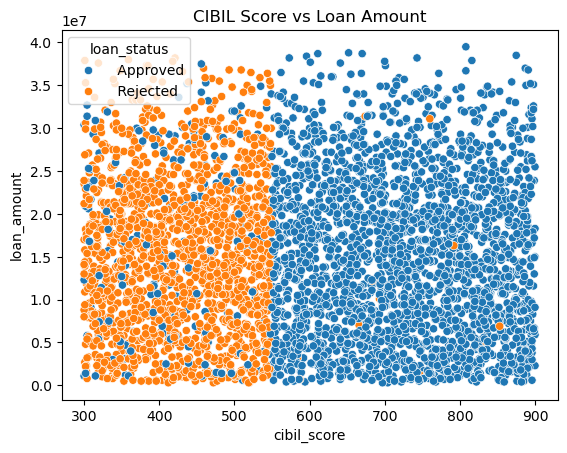

In [20]:
sns.scatterplot(x='cibil_score', y='loan_amount', hue='loan_status', data=df)
plt.title('CIBIL Score vs Loan Amount')
plt.show()


From analyzing the scatterplot, We can see that there is a higher chance of applicants loan being approved when they have a cibil score of 550 and above as the approved(represented by the blue colour) is more common after 550 cibil score. Rejected loans(represented by orange) is predominant at below 550 cibil score. 

Loan amount shows a uniform distribution across both approved and rejected loans, indicating that the loan amount does not strongly influence loan status in isolation, this was confirmed earlier using the box plot earlier. 

CIBIL Score is a critical factor in determining loan approval. Borrowers with a CIBIL score below 550 are much more likely to face rejection.

Income per annum Vs Reseidential Asset Value Vs Loan Status

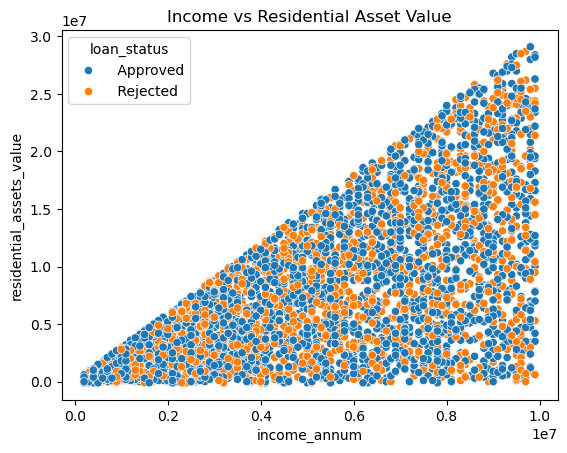

In [21]:
sns.scatterplot(x='income_annum', y='residential_assets_value', hue='loan_status', data=df)
plt.title('Income vs Residential Asset Value')
plt.show()


There is a strong positive correlation between income_annum and residential_assets_value, as expected. Higher incomes correspond to higher residential asset values.
Approved loans (blue points) and rejected loans (orange points) are evenly distributed across this relationship. There is no clear segregation between the two categories.
This means that Income and Asset Values are correlated but do not directly impact loan status. 

Number of Dependents Vs Loan Amount Vs Loan Status

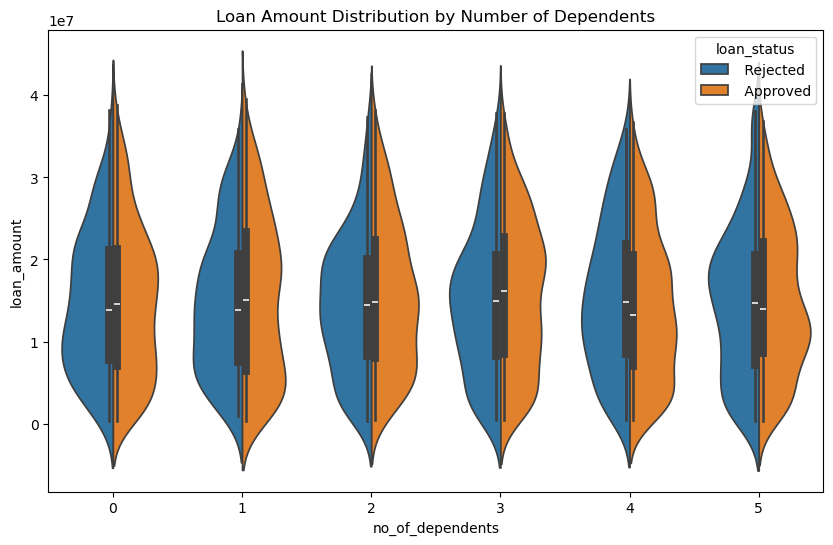

In [22]:
plt.figure(figsize=(10,6))
sns.violinplot(x='no_of_dependents', y='loan_amount', hue='loan_status', split=True, data=df)
plt.title('Loan Amount Distribution by Number of Dependents')
plt.show()


Loan amounts are positively skewed (majority of loans are smaller, but some large loans are present).
Both Approved and Rejected loans follow a similar distribution across all categories of dependents 
The number of dependents does not appear to drastically change the distribution of loan amounts for both approved and rejected loans as loan approvals and rejections are spread fairly consistently across all dependent groups, from 0 to 5 dependents. 

In number of dependents categories 3 and 4 , there is a slight variance in rejected loans .

Major insight from the violin plot is that the number of dependents alone might not be a strong differentiator in determining whether a loan is approved or rejected.

Heatmaps of numerical variables

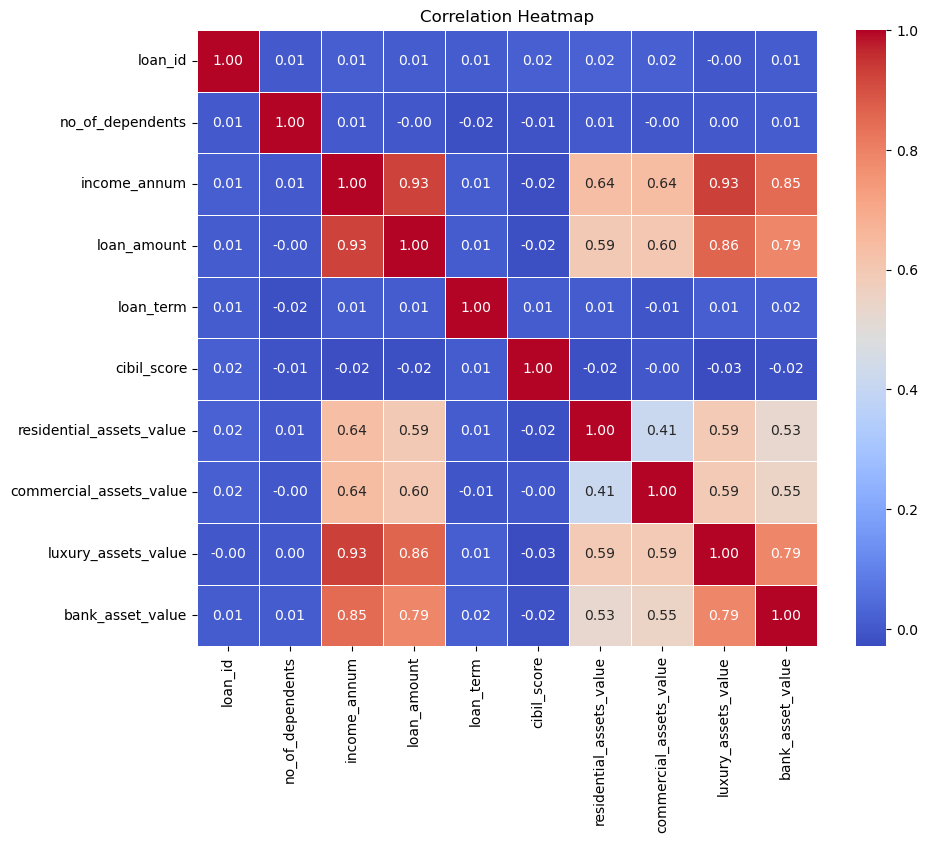

In [23]:
# Select only numeric columns for correlation
correlation_matrix = df.select_dtypes(include=['number']).corr()  

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


From analyzing the heatmap, We can see;
Variables with Strong Positive Correlations:
1. Income Annum and Loan Amount (0.93): Higher income is strongly correlated with larger loan amounts. This indicates that borrowers with higher incomes tend to receive larger loans as expected.
2. Income Annum and Luxury Assets Value (0.93): Individuals with higher incomes tend to have more valuable luxury assets.
3. Loan Amount and Luxury Assets Value (0.86): Those who take out larger loans tend to possess more valuable luxury assets.
4. Bank Asset Value and Income Annum (0.85): Higher income levels are strongly associated with higher bank asset values, which may suggest financial stability.
5. Loan Amount and Bank Asset Value (0.79): Higher loan amounts are associated with higher bank asset values.

Moderate Positive Correlations:
1. Residential Assets Value and Income Annum (0.64): Higher income levels are moderately correlated with more valuable residential assets.
2. Commercial Assets Value and Income Annum (0.64): Individuals with higher income levels tend to have more valuable commercial assets.
3. Loan Amount and Residential Assets Value (0.59): Larger loan amounts are moderately associated with more valuable residential assets.

Weak or No Correlation:
1. CIBIL Score: Very weak correlations with most variables, indicating that it might not strongly influence or relate to the other variables in this dataset.
2. No. of Dependents: No significant correlations with other variables, suggesting it doesn't have a noticeable impact on income, loan amount, or asset values.
3. Loan Term: No significant correlations with other variables.

Next step of this project would be Data Preprocessing stage, This is where we will be encoding categorical variables and scaling features if needed.

### Step 4 Data Preprocessing

This is a very important stage in the project as this is the point in which we will make the dataset clean and ready for modelling purposes.

For the first step, I will be encoding the categorical variables(Education and Self-Employment) using One Hot encoding while for the loan status I will be using Label encoding

In [24]:
df = pd.get_dummies(df, columns=['education', 'self_employed'], drop_first=True) #Drop first is to avoid multi-colinearity

le = LabelEncoder()

df['loan_status'] = le.fit_transform(df['loan_status'])

df = df.astype(int)

df.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


In [25]:
print(le.inverse_transform([0, 1]))  # To confirm which is apprived or not approved. This is important for model evealuation


[' Approved' ' Rejected']


Next step in the data preprocessing is to split the dataset into x and y (train and test)

In [26]:
x = df.drop(columns=['loan_status','loan_id'], axis=1)  # Independent variables
y = df['loan_status']  # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

The next step is to scale the numerical features, this is important because scaling ensures that numerical features are on a similar scale, preventing features with larger ranges (e.g., income) from dominating those with smaller ranges (e.g., cibil score).This is crucial for machine learning algorithms sensitive to feature magnitude, like Logistic Regression, SVM, and KNN, ensuring better model performance and faster convergence during optimization. 

In [27]:
numerical_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                  'residential_assets_value', 'commercial_assets_value',
                  'luxury_assets_value', 'bank_asset_value', 'no_of_dependents']

scaler = StandardScaler()

# we will be fitting the scaler on the training set and transform both training and test sets
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])


We only transform the test set (not fit) to ensure it uses the same scaling parameters (mean and standard deviation) as the training set. This prevents data leakage and ensures the model is evaluated on unseen, consistent data which is common in real-world scenario.

### Step 5 Model Training and Evaluation

In this step, We will be training our models(Logistic Rgression, K-Nearest Neighbor,Support Vector Classifier, Decision Tree Classifer, and Random Forest Classifier ) 
After which we would evaluate and refine to know which model works out best.

In [28]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42), 
    'RFC': RandomForestClassifier(random_state=42)
}

# Evaluate models
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate F1-Score
    f1_approved = f1_score(y_test, y_pred,pos_label=0)
    f1_not_approved = f1_score(y_test, y_pred,pos_label=1)
    # Calculate Precision and Recall on both classes
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_approved = report['0']['precision']  # Precision for the approved class (0)
    recall_approved = report['0']['recall']  # Recall for the approved(0)
    precision_not_approved = report['1']['precision'] # Precision for the not approved class(1)
    recall_not_approved = report['1']['recall'] # Recall for the not approved class (1)
    # Print the evaluation metrics
    print(f"{model_name} - Accuracy: {accuracy},Approved F1-Score: {f1_approved},Not Approved f1 score {f1_not_approved} ,Approved Precision: {precision_approved}, Approved Recall: {recall_approved},Not Approved Precision : {precision_not_approved}, Not Approved Recall : {recall_not_approved}")


Logistic Regression - Accuracy: 0.905152224824356,Approved F1-Score: 0.924791086350975,Not Approved f1 score 0.8716323296354992 ,Approved Precision: 0.9205175600739371, Approved Recall: 0.9291044776119403,Not Approved Precision : 0.8785942492012779, Not Approved Recall : 0.8647798742138365
Decision Tree - Accuracy: 0.9742388758782201,Approved F1-Score: 0.9795158286778398,Not Approved f1 score 0.9652996845425867 ,Approved Precision: 0.9776951672862454, Approved Recall: 0.9813432835820896,Not Approved Precision : 0.9683544303797469, Not Approved Recall : 0.9622641509433962
KNN - Accuracy: 0.8992974238875878,Approved F1-Score: 0.9185606060606061,Not Approved f1 score 0.8680981595092024 ,Approved Precision: 0.9326923076923077, Approved Recall: 0.9048507462686567,Not Approved Precision : 0.8473053892215568, Not Approved Recall : 0.889937106918239
SVM - Accuracy: 0.9285714285714286,Approved F1-Score: 0.9427230046948357,Not Approved f1 score 0.9051321928460342 ,Approved Precision: 0.948960302

### Baseline Model Performance Summary

| Model             | Accuracy   |Approved f1-Score |Not approved F1-Score       | Approved Precision | Approved Recall | Not Approved Precision | Not Approved Recall |
|-------------------|------------|-------------|---------------------------------|--------------------|-----------------|------------------------|---------------------|
| Logistic Regression | 0.9052   | 0.92479  | 0.8716      | 0.9205             | 0.9291          | 0.8786                 | 0.8648              |
| Decision Tree      | 0.9742    |0.9795 | 0.9653       | 0.9777             | 0.9813          | 0.9684                 | 0.9623              |
| KNN                | 0.8993    |0.91856 | 0.8681       | 0.9327             | 0.9049          | 0.8473                 | 0.8899              |
| SVM                | 0.9286    |0.9427 | 0.9051       | 0.9490             | 0.9366          | 0.8954                 | 0.9151              |
| RFC                | 0.9754    | 0.9805| 0.9666        | 0.9742             | 0.9869          | 0.9775                 | 0.9560              |


The Most important part of this project is how well the models predict the Approval of loans(approved class), Therefore, the main thing we will be watching for is the approved scores of the models, But for better comparison ,we still need how well they can predict the not approved class too.


Based on the table above, 
Best Accuracy and F1-Score: The Random Forest Classifier (RFC) achieved the highest accuracy (97.54%) and F1-Score (0.9805), making it the most reliable model for overall performance.

High Precision and Recall for 'Approved' Loans: The Decision Tree and Random Forest models performed exceptionally well for predicting 'Approved' loans, with precision and recall values both above 97%, indicating strong performance in identifying approved loans.

SVM Shows Balanced Performance: SVM provided a strong balance between precision and recall, especially for the 'Not Approved' class, with reasonably high precision and recall values (around 90%).

KNN Has Lower Precision and Recall: KNN had the lowest performance in terms of accuracy (89.93%) and precision/recall for both classes, particularly for the 'Not Approved' class, making it less reliable for this task compared to other models.

Random ForestClassifier and Decision Trees are the best performing models and they are the models we will be selecting for hyperparameter tuning before deciding to pick the best model. We will be using GridSearch CV to perform the hyperparemeter tuning in the next step.

We will be starting with choosing a few parameters we want to hypertune for the decision tree model
To do this, We will first initialize the model(i.e, decision tree classifier), set a paramters dictionary for a few of the parameters for decision trees like criterion, max_depth,etc. Then train a gridsearch using the paramters and the model , if we do not specify the scoring metric, GridSearchCV picks the default for classifiers which is accuracy and R2 score for regression models. For this project we will be using F1 score as this is a good metric for imbalanced datasets like ours and it kind of balances the  Precision and Recall, making it ideal for datasets where one class ("Approved") occurs more frequently than the other ("Not Approved").


We will be using the make_scorer attribute with the average=weighted parameter to account for the little class imbalance 

In [35]:
#initialize the decision tree model 

tree = DecisionTreeClassifier(random_state=42)

# Create a dictionary of parameters of the deicion tree we want to tune 

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [None, 'sqrt', 'log2'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]} 

f1_scorer = make_scorer(f1_score,average='weighted')

# Initialize the gridsearch model 

tree_grid = GridSearchCV(estimator=tree,param_grid=parameters,cv=10,scoring=f1_scorer,n_jobs=-1) #n_jobs for faster computation 

tree_grid.fit(x_train,y_train) 

print(f"The Best Decision Tree parameters are: {tree_grid.best_params_}")
print(f"The Best Decision Tree f1 score : {tree_grid.best_score_}")




The Best Decision Tree parameters are: {'criterion': 'entropy', 'max_depth': 18, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
The Best Decision Tree f1 score : 0.9824346981541876


The next step is to perform hyperparameters tuning for the Random Forest CLassifier 

Finally, train final models for decision trees and Random Forest using the best paramters.

In [37]:
forest = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2',None],
              'class_weight': ["balanced", {0: 1.2, 1: 1}],
} 

forest_grid = GridSearchCV(estimator=forest,param_grid=param_grid,scoring=f1_scorer,cv=10,n_jobs=-1) 

forest_grid.fit(x_train,y_train) 

print(f"The Best Random Forest CLassifier parameters are: {forest_grid.best_params_}")
print(f"The Best Random Forest CLassifier f1 score : {forest_grid.best_score_}")



The Best Random Forest CLassifier parameters are: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
The Best Random Forest CLassifier f1 score : 0.9856343487373804


In [41]:
best_tree = tree_grid.best_estimator_

tree_grid_pred = best_tree.predict(x_test) 

# Get the metrics score for each class 
tree_final_accuracy = accuracy_score(y_test,tree_grid_pred)

tree_final_f1_approved = f1_score(y_test,tree_grid_pred,pos_label=0)
tree_final_f1_not_approved = f1_score(y_test,tree_grid_pred,pos_label=1)

tree_final_recall_approved = recall_score(y_test,tree_grid_pred,pos_label=0)
tree_final_recall_not_approved = recall_score(y_test,tree_grid_pred,pos_label=1)

tree_final_precision_approved = precision_score(y_test,tree_grid_pred,pos_label=0)
tree_final_precision_not_approved = precision_score(y_test,tree_grid_pred,pos_label=1)

print(f"The accuracy of decision tree after gridsearch is {tree_final_accuracy}")
print(f"The approved class f1 score of decision tree after gridsearch is {tree_final_f1_approved}")
print(f"The Not approved class f1 score of decision tree after gridsearch is {tree_final_f1_not_approved}")
print(f"The Approved precision of decision tree after gridsearch is {tree_final_recall_approved}")
print(f"The Not approved precision of decision tree after gridsearch is {tree_final_recall_not_approved}")
print(f"The Approved recall of decision tree after gridsearch is {tree_final_precision_approved}")
print(f"The Not approved recall of decision tree after gridsearch is {tree_final_precision_not_approved}")


The accuracy of decision tree after gridsearch is 0.9800936768149883
The approved class f1 score of decision tree after gridsearch is 0.9841269841269841
The Not approved class f1 score of decision tree after gridsearch is 0.9733124018838305
The Approved precision of decision tree after gridsearch is 0.9832089552238806
The Not approved precision of decision tree after gridsearch is 0.9748427672955975
The Approved recall of decision tree after gridsearch is 0.9850467289719627
The Not approved recall of decision tree after gridsearch is 0.9717868338557993


In [40]:
best_forest = forest_grid.best_estimator_

forest_grid_pred = best_forest.predict(x_test) 

forest_final_accuracy = accuracy_score(y_test,forest_grid_pred)

forest_final_f1_approved = f1_score(y_test,forest_grid_pred,pos_label=0)
forest_final_f1_not_approved = f1_score(y_test,forest_grid_pred,pos_label=1)

forest_final_recall_approved = recall_score(y_test,forest_grid_pred,pos_label=0)
forest_final_recall_not_approved = recall_score(y_test,forest_grid_pred,pos_label=1)

forest_final_precision_approved = precision_score(y_test,forest_grid_pred,pos_label=0)
forest_final_precision_not_approved = precision_score(y_test,forest_grid_pred,pos_label=1)

print(f"The accuracy of Random Forest after gridsearch is {forest_final_accuracy}")
print(f"The approved class f1 score of Random Forest after gridsearch is {forest_final_f1_approved}")
print(f"The Not approved class f1 score of Random Forest after gridsearch is {forest_final_f1_not_approved}")
print(f"The Approved precision of Random Forest after gridsearch is {forest_final_recall_approved}")
print(f"The Not approved precision of Random Forest after gridsearch is {forest_final_recall_not_approved}")
print(f"The Approved recall of Random Forest after gridsearch is {forest_final_precision_approved}")
print(f"The Not approved recall of Random Forest after gridsearch is {forest_final_precision_not_approved}")



The accuracy of Random Forest after gridsearch is 0.9800936768149883
The approved class f1 score of Random Forest after gridsearch is 0.9842154131847726
The Not approved class f1 score of Random Forest after gridsearch is 0.9730586370839936
The Approved precision of Random Forest after gridsearch is 0.9888059701492538
The Not approved precision of Random Forest after gridsearch is 0.9654088050314465
The Approved recall of Random Forest after gridsearch is 0.9796672828096118
The Not approved recall of Random Forest after gridsearch is 0.9808306709265175


### Baseline Models without tuning 

| Model               | Metric                  | Approved (Class 0) | Not Approved (Class 1) | Overall   |
|----------------------|-------------------------|---------------------|-------------------------|-----------|
| **Decision Tree**    | Accuracy               | -                   | -                       | 97.42%    |
|                      | F1-Score               | 0.9795              | 0.9653                  | -         |
|                      | Precision              | 0.9777              | 0.9684                  | -         |
|                      | Recall                 | 0.9813              | 0.9623                  | -         |
| **Random Forest**    | Accuracy               | -                   | -                       | 97.54%    |
|                      | F1-Score               | 0.9805              | 0.9666                  | -         |
|                      | Precision              | 0.9742              | 0.9775                  | -         |
|                      | Recall                 | 0.9869              | 0.9560                  | -         |


### Selected Models After Grid Search 

| Model               | Metric                  | Approved (Class 0) | Not Approved (Class 1) | Overall   |
|----------------------|-------------------------|---------------------|-------------------------|-----------|
| **Decision Tree**    | Accuracy               | -                   | -                       | 98.01%    |
|                      | F1-Score               | 0.9841              | 0.9733                  | -         |
|                      | Precision              | 0.9832              | 0.9748                  | -         |
|                      | Recall                 | 0.9850              | 0.9718                  | -         |
| **Random Forest**    | Accuracy               | -                   | -                       | 98.01%    |
|                      | F1-Score               | 0.9842              | 0.9731                  | -         |
|                      | Precision              | 0.9888              | 0.9654                  | -         |
|                      | Recall                 | 0.9797              | 0.9808                  | -         |


Observations:
1. Both Decision Tree and Random Forest models show an improvement in metrics after hyperparameter tuning.
2. The overall accuracy improved to 98.01% for both models, a slight but meaningful increase. 
3. The F1-Score, Precision, and Recall for both classes also improved, showing better balance in handling both Approved (Class 0) and Not Approved (Class 1) cases. 
4. Random Forest Slightly better F1-Score for Approved (Class 0) (0.9842 vs. 0.9841 for Decision Tree) and a comparable F1-Score for Not Approved (Class 1) (0.9731 vs. 0.9733 for Decision Tree).
5. Decision Tree has better Recall for Approved (Class 0) (0.9850 vs. 0.9797 for Random Forest), meaning it's better at identifying true positives in the approved class.
Random Forest, however, has better Recall for Not Approved (Class 1) (0.9808 vs. 0.9718 for Decision Tree), meaning it's better at detecting the Not Approved class.



Based on these observations, Both models are actually performing similarly with some slight differences. 

Next step is to plot a confusion matrix to see how well the models predicted 


Confusion Matrix for Decision Tree:
[[527   9]
 [  8 310]]

Confusion Matrix for Random Forest:
[[530   6]
 [ 11 307]]


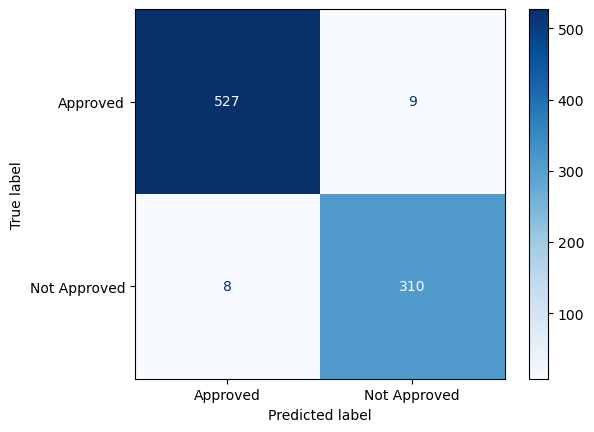

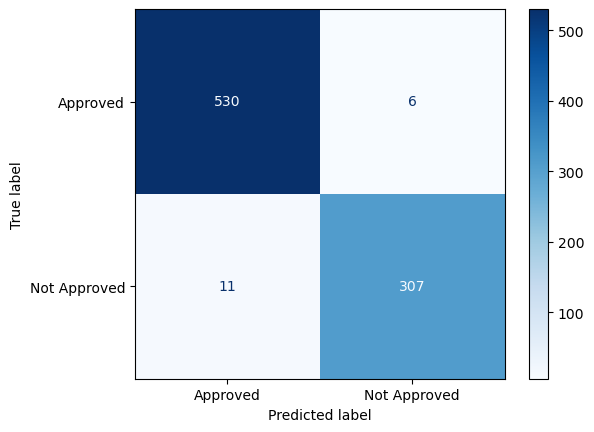

In [47]:
# Generate confusion matrices for both models
models_CM = {
    "Decision Tree": tree_grid.best_estimator_,
    "Random Forest": forest_grid.best_estimator_,
}

for model_name, model in models_CM.items():
    # Predict on test set
    y_test_pred = model.predict(x_test)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm)
    
    # Visualize confusion matrix
    custom_labels = ["Approved", "Not Approved"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=custom_labels)
    disp.plot(cmap="Blues")

1. Decision Tree:

    True Positives (Approved, predicted as Approved): 527

    False Negatives (Approved, predicted as Not Approved): 9

    True Negatives (Not Approved, predicted as Not Approved): 310
    
    False Positives (Not Approved, predicted as Approved): 8

2. Random Forest:

    True Positives (Approved, predicted as Approved): 530
    
    False Negatives (Approved, predicted as Not Approved): 6
    
    True Negatives (Not Approved, predicted as Not Approved): 307
    
    False Positives (Not Approved, predicted as Approved): 11

Based on the confusion matrix, both models do a great job at predicting most bu with little errors as shown above(false negatives and false positives)

To decide what model to use based on this is down to what is important , but as we stated earlier, Approved class (0) is the most important ,therefore, Random Forest classifier is the model we will  be picking but if the Not approved class(1) was the priority , Decision Tree does a better job at predicting it.

Next Step it to see whuch features contributed the most to the model's prediction. The random forest classifier model has a .feature_importances attribute that allows us we see which features contribute the most 

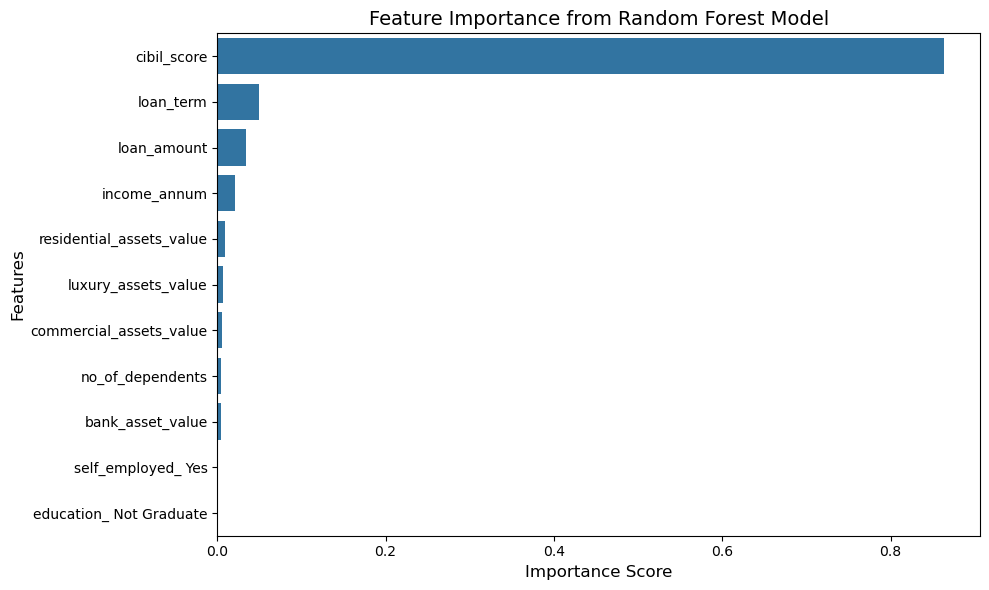

In [53]:
feature_importances = best_forest.feature_importances_

features =  x_train.columns.tolist()

# Creating a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Model', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


Looking at the bar plot of the features arranged according to importance, we can see that CIBIL SCORE is the most critical factor influencing loan approval 

followed not so closely by loan term and loan amount respectfully.  Self employed and Education status contribute close to 0 in influencing loan approvals

### Conclusion 

In this project, we successfully developed a machine learning pipeline to predict loan approvals based on applicant and loan attributes. Through exploratory data analysis, we gained insights into the relationships between key features and loan status. After testing multiple models, the Random Forest Classifier emerged as the best-performing model due to its high accuracy and robust performance.

Key findings from the feature importance analysis highlighted the significant impact of CIBIL Score, Annual Income, and Loan Amount on loan approvals. These insights could help financial institutions refine their decision-making processes for loan approvals.

#### Thank you completing, Feedback would be appreciated!!!